In [1]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification



In [2]:
# Read the file of the clean data-which is conducted in the previous notebook
loan_data=pd.read_csv("clean_data.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
loan_data.head(10)

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,delinq_2yrs,inq_last_6mths,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,last_pymnt_amnt,good_bad,dti_bins_encoder,annual_inc_bins_encoder
0,70.710678,36,10.65,B,B2,10.0,RENT,Verified,FullyPaid,credit_card,0.0,1.0,116.824655,83.7,3.000000,0.00,0.00,171.62,1,3,1
1,50.000000,60,15.27,C,C4,0.0,RENT,SourceVerified,ChargedOff,car,0.0,5.0,41.073106,9.4,2.000000,0.00,0.00,119.66,1,1,1
2,48.989795,36,15.96,C,C4,10.0,RENT,NotVerified,FullyPaid,small_business,0.0,2.0,54.369109,98.5,3.162278,0.00,0.00,649.91,1,2,1
3,100.000000,36,13.49,C,C1,10.0,RENT,SourceVerified,FullyPaid,other,0.0,1.0,74.819783,21.0,6.082763,0.00,16.97,357.48,1,3,2
4,54.772256,60,12.69,B,B4,1.0,RENT,SourceVerified,Current,other,0.0,0.0,166.682333,53.9,6.164414,766.90,0.00,67.79,1,0,0
5,70.710678,36,7.90,A,A4,3.0,RENT,SourceVerified,FullyPaid,wedding,0.0,3.0,89.235643,28.3,3.464102,0.00,0.00,161.03,1,2,1
6,83.666003,60,15.96,C,C4,8.0,RENT,NotVerified,Current,debt_consolidation,0.0,1.0,133.139025,85.6,3.316625,1889.15,0.00,170.08,1,3,2
7,54.772256,36,18.64,E,E1,9.0,RENT,SourceVerified,FullyPaid,car,0.0,2.0,90.669730,87.5,2.000000,0.00,0.00,111.34,1,1,2
8,74.833148,60,21.28,F,D4,4.0,OWN,SourceVerified,ChargedOff,small_business,0.0,2.0,72.180330,32.6,3.605551,0.00,0.00,152.39,1,1,1
9,73.314391,60,12.69,B,B4,0.0,RENT,Verified,ChargedOff,other,0.0,0.0,96.327566,36.5,1.732051,0.00,0.00,121.45,1,0,1


In [5]:
#checking for null values before starting to modelling process
loan_data.isna().sum()

loan_amnt                  0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
verification_status        0
loan_status                0
purpose                    0
delinq_2yrs                0
inq_last_6mths             0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
total_rec_late_fee         0
last_pymnt_amnt            0
good_bad                   0
dti_bins_encoder           0
annual_inc_bins_encoder    0
dtype: int64

In [8]:
# X_num

In [9]:
#spiliting data to X and y:

y = loan_data['good_bad']
X = loan_data.drop('good_bad', axis=1)




In [10]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'df' is your DataFrame with risk drivers and target 'y'
# # Replace 'Target' with the actual column name of your target variable
# target_variable = 'Target'

# # Selecting the risk driver columns
# risk_drivers = df.drop(columns=[target_variable])

# # Combining risk drivers and the target variable for visualization
# combined_data = pd.concat([risk_drivers, df[target_variable]], axis=1)

# # Plot histograms for numeric features
# numeric_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns
# for col in numeric_columns:
#     plt.figure(figsize=(8, 5))
#     sns.histplot(data=combined_data, x=col, hue=target_variable, multiple='stack', bins=30)
#     plt.title(f'Distribution of {col} with {target_variable}')
#     plt.show()

# Plot count plots for categorical features
# categorical_columns = combined_data.select_dtypes(include='object').columns
# for col in X_cat:
#     plt.figure(figsize=(8, 5))
#     sns.countplot(data=X_cat , x=col, hue=y)
#     plt.title(f'Distribution of {col} with {y}')
#     plt.xticks(rotation=45)
#     plt.show()


In [11]:
display(X.shape)
display(y.shape)

(28884, 20)

(28884,)

In [12]:
# Let's train and then test our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [13]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

In [14]:
X_train_cat

,grade,sub_grade,home_ownership,verification_status,loan_status,purpose
16416,B,B4,RENT,SourceVerified,FullyPaid,credit_card
23700,A,A4,RENT,Verified,FullyPaid,debt_consolidation
239,B,B4,RENT,Verified,FullyPaid,credit_card
18138,B,B3,RENT,NotVerified,ChargedOff,other
4174,D,D4,RENT,Verified,Current,debt_consolidation
...,...,...,...,...,...,...
19623,A,A3,RENT,Verified,FullyPaid,credit_card
9448,C,C3,RENT,Verified,FullyPaid,debt_consolidation
860,B,B4,MORTGAGE,Verified,FullyPaid,debt_consolidation
24765,B,B1,MORTGAGE,SourceVerified,FullyPaid,credit_card


In [15]:
X_test_cat

,grade,sub_grade,home_ownership,verification_status,loan_status,purpose
7236,B,B3,MORTGAGE,NotVerified,FullyPaid,credit_card
19012,B,B2,RENT,SourceVerified,FullyPaid,credit_card
21207,B,B1,RENT,SourceVerified,FullyPaid,house
10309,D,D4,RENT,SourceVerified,ChargedOff,debt_consolidation
780,A,A1,MORTGAGE,Verified,FullyPaid,small_business
...,...,...,...,...,...,...
23502,D,D4,MORTGAGE,SourceVerified,ChargedOff,major_purchase
6065,C,C2,RENT,Verified,FullyPaid,other
22009,C,C2,RENT,Verified,FullyPaid,debt_consolidation
18943,A,A2,MORTGAGE,SourceVerified,FullyPaid,debt_consolidation


In [16]:
X_train_num.shape

(23107, 14)

In [17]:
y_train

16416    1
23700    1
239      1
18138    1
4174     1
        ..
19623    1
9448     1
860      1
24765    1
3223     1
Name: good_bad, Length: 23107, dtype: int64

In [18]:
y_train.shape

(23107,)

In [19]:
X_test_num.shape

(5777, 14)

In [20]:
y_test

7236     1
19012    1
21207    1
10309    1
780      1
        ..
23502    1
6065     1
22009    1
18943    1
1497     1
Name: good_bad, Length: 5777, dtype: int64

In [21]:
y_test.shape

(5777,)

In [22]:
# Normalizing data
transformer = MinMaxScaler().fit(X_train_num) 
X_train_scaled_arr = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_num.columns)
X_train_scaled



,loan_amnt,term,int_rate,emp_length,delinq_2yrs,inq_last_6mths,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,last_pymnt_amnt,dti_bins_encoder,annual_inc_bins_encoder
0,0.501233,0.0,0.296818,0.0,0.000000,0.000,0.271765,0.889890,0.298598,0.000000,0.0,0.066249,0.333333,0.666667
1,0.706281,0.0,0.077726,0.3,0.000000,0.000,0.374368,0.624625,0.468637,0.000000,0.0,0.020248,0.000000,1.000000
2,0.465073,0.0,0.365154,0.8,0.000000,0.000,0.351358,0.745746,0.403377,0.000000,0.0,0.010473,0.666667,1.000000
3,0.439838,0.0,0.258216,1.0,0.000000,0.125,0.236814,0.296296,0.330544,0.000000,0.0,0.009109,0.333333,0.666667
4,0.584405,1.0,0.634324,0.0,0.111111,0.375,0.322447,0.515516,0.456083,0.339211,0.0,0.010600,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23102,0.465073,0.0,0.078247,0.0,0.000000,0.125,0.163769,0.138138,0.493089,0.000000,0.0,0.008571,0.666667,0.333333
23103,0.552236,0.0,0.447053,0.4,0.000000,0.125,0.397527,0.716717,0.314806,0.000000,0.0,0.014346,0.666667,0.000000
23104,0.864752,1.0,0.379238,0.0,0.000000,0.000,0.410939,0.502503,0.493089,0.000000,0.0,0.154652,1.000000,0.000000
23105,0.501233,0.0,0.258738,0.5,0.000000,0.125,0.290215,0.523524,0.360759,0.000000,0.0,0.025831,0.000000,0.333333


In [83]:
# categorical=loan_data.select_dtypes(include=object)
# categorical

In [24]:
#convert categorical to dummy:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
onehot_encoded = pd.DataFrame(encoded_cat, columns=cols)
onehot_encoded


,grade_B,grade_C,grade_D,grade_E,grade_F,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,home_ownership_OWN,home_ownership_RENT,verification_status_SourceVerified,verification_status_Verified,loan_status_Current,loan_status_Default,loan_status_FullyPaid,loan_status_InGracePeriod,loan_status_Late(16-30days),loan_status_Late(31-120days),purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23102,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23103,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23104,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23105,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#X_train_scaled.isna().sum()

In [26]:
# X_train_cat.reset_index(inplace= True, drop=True)

In [27]:
X_train_treated = pd.concat([X_train_scaled, onehot_encoded], axis=1)

In [28]:
#X_train_treated.columns.nunique()

In [29]:
#y_train.reset_index(inplace=True, drop=True)

In [30]:
#y_train

In [31]:
#X_train_treated = X_train_treated.fillna(0)

In [32]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_treated, y_train)

In [33]:
score_train = classification.score(X_train_treated, y_train)
score_train     #indicating high performance on the data used for training

0.9998268922837236

# Brif insight into our model
Here's what these coefficients can tell us:

- Magnitude of Coefficients:
A positive coefficient indicates: The corresponding feature increases==> the predicted outcome is more likely to be in the positive class.
A negative coefficient suggests: The feature increases==> the predicted outcome is more likely to be in the negative class.

- Feature Importance:
The magnitude of the coefficients gives an indication of the feature's importance in making predictions. Larger magnitudes generally imply a stronger impact on the predicted outcome.

- Zero Coefficients:
Coefficients close to zero suggest that the corresponding features have minimal impact on predictions.

In [34]:
#Provides insights into the importance and contribution of each feature to the model's predictions.
coefficients = classification.coef_[0]
features = X_train_treated.columns

for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef}")

loan_amnt: 0.13090167149595122
term: -0.6084369526055013
int_rate: -0.07012813532015674
emp_length: 0.020090223052636105
delinq_2yrs: 0.048161879376246115
inq_last_6mths: 0.0001533944505808016
revol_bal: 0.11666134942713687
revol_util: 0.04617795346690698
total_acc: 0.15015359942776496
out_prncp: -0.5649291463642101
total_rec_late_fee: 0.04124519166275021
last_pymnt_amnt: 0.1085289592497515
dti_bins_encoder: -0.3396335137697083
annual_inc_bins_encoder: -0.04669355376457053
grade_B: 0.03857836673813271
grade_C: -0.24155852277545128
grade_D: -0.005105595452511674
grade_E: -0.0943209280351773
grade_F: 0.13099371774657917
sub_grade_A2: 0.02426033348405644
sub_grade_A3: 0.03134983427786031
sub_grade_A4: 0.09870462910856541
sub_grade_B1: 0.04403925601757043
sub_grade_B2: 0.06069103046372954
sub_grade_B3: 0.09883963343583052
sub_grade_B4: -0.16499155317899777
sub_grade_C1: 0.1544953240569069
sub_grade_C2: -0.26991586985139565
sub_grade_C3: -0.27726922324090464
sub_grade_C4: 0.1511312462599421

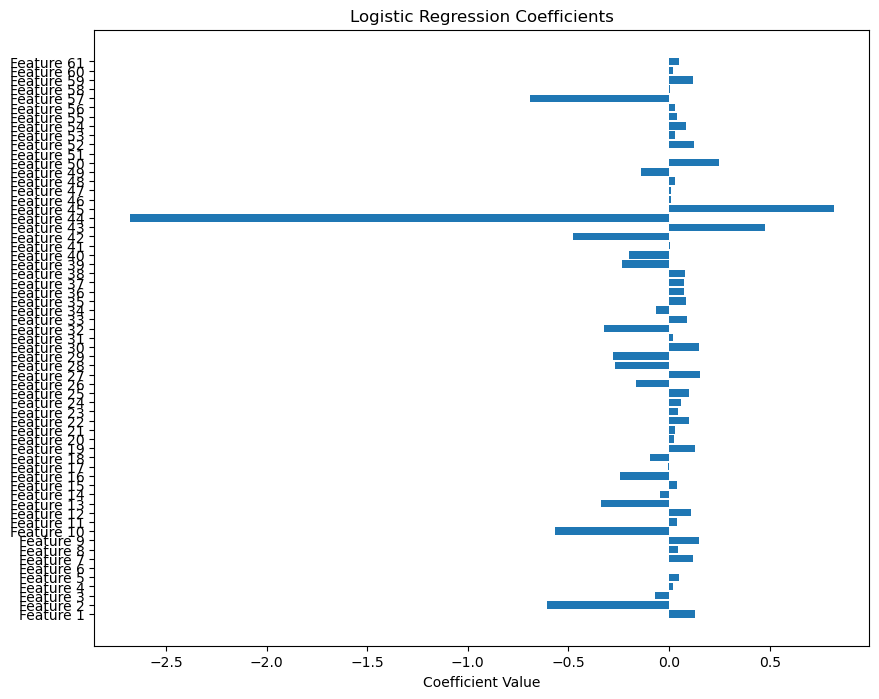

In [35]:
# Extract the coefficients and feature names
coefficients = classification.coef_[0]
feature_names = [f'Feature {i+1}' for i in range(len(coefficients))]

# Plot the coefficients
plt.figure(figsize=(10, 8))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.tick_params(axis='y', rotation=0) 
plt.show()



In [36]:
#Normalizing-test set data
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)

In [37]:
#Coverting to dummy- test set data
encoded_test_cat = encoder.transform(X_test_cat).toarray()
onehot_encoded_test = pd.DataFrame(encoded_test_cat, columns=cols)


In [38]:
#X_test_cat.isna().sum()

In [39]:
X_test_treated=pd.concat([X_test_scaled, onehot_encoded_test], axis=1)

In [40]:
predictions = classification.predict(X_test_treated )   
classification.score(X_test_treated, y_test)   #

0.9993075990998789

# Insight to test dataset:

Our model seems to provide accurate predictions on the test dataset, as indicated by the high accuracy score. However, that accuracy alone may not be sufficient in all cases, especially when dealing with imbalanced datasets. We should consider other evaluation metrics and perform a thorough analysis of our model's performance.

In [41]:
predictions.shape   

(5777,)

In [42]:
y_test.reset_index(inplace= True,drop=True)

In [43]:
y_test

0       1
1       1
2       1
3       1
4       1
       ..
5772    1
5773    1
5774    1
5775    1
5776    1
Name: good_bad, Length: 5777, dtype: int64

# Compare other Model:
In our scenario, the exemplary performance of our model is evident, leaving little justification for examining alternative models.Just for curiosity, I used different regression models, such as k-nearest neighbours (KNN), alongside logistic regression. It is noteworthy that KNN is a non-parametric algorithm and can capture non-linear relationships between features, which can be beneficial if the relationship between credit risk factors is not well-modelled by linear methods like logistic regression.

In [46]:
#bulid model with KNN:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X_train_treated , y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
predictions_clf = clf.predict(X_test_treated)  
clf.score(X_test_treated, y_test)

#Both models, KNN and logistic regression, are performing exceptionally well based on the highscores. This suggests that they are effectively capturing the patterns and relationships present in the data.

C:\Users\Parinaz\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Parinaz\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


0.9993075990998789

# Analyze our model's performance

As mentioned before, the accuracy alone may not be sufficient. We should consider other evaluation metrics and thoroughly analyze our model's performance.The result shows our model performance is perfect.

In [48]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("precision: ",precision_score(y_test,predictions_clf )) #==> true positive predictions (correctly predicted positive instances) to the total number of positive predictions made by the model
#Precision = True Positives / (True Positives + False Positives)==>positive predictions 
print("recall: ",recall_score(y_test,predictions_clf )) #==> Recall = True Positives / (True Positives + False Negatives)==> actual positives/High recall=model is good to capture the positive intances.
print("f1: ",f1_score(y_test,predictions_clf )) 

precision:  0.9993075990998789
recall:  1.0
f1:  0.9996536796536796


In [49]:
# results = test_models(X_train_treated ,X_test_scaled,y_train,y_test)

In [50]:
print("precision: ",precision_score(y_test,predictions)) #==> true positive predictions (correctly predicted positive instances) to the total number of positive predictions made by the model
#Precision = True Positives / (True Positives + False Positives)==>positive predictions 
print("recall: ",recall_score(y_test,predictions)) #==> Recall = True Positives / (True Positives + False Negatives)==> actual positives/High recall=model is good to capture the positive intances.
print("f1: ",f1_score(y_test,predictions)) #===>It provides a balance between precision and recall.

##If you want to ensure you capture as many true positives as possible, recall might be more important. 

precision:  0.9993075990998789
recall:  1.0
f1:  0.9996536796536796


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[   0,    4],
       [   0, 5773]], dtype=int64)

In [52]:
#The ROC-AUC curve provides a visual representation of the trade-off between sensitivity and specificity across different probability thresholds.

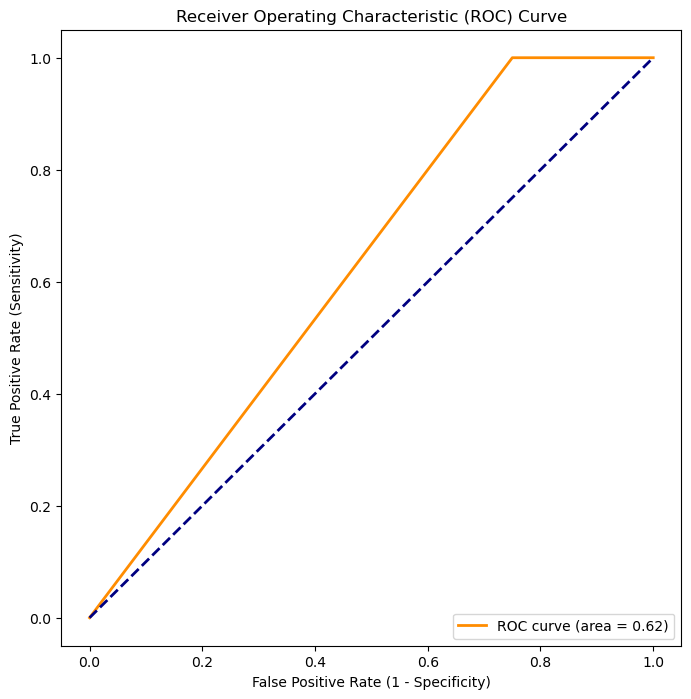

In [53]:
#ROC-AUC
#returns the predicted probabilities of the positive class (class 1) for each sample in X_test

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities on the test set
y_probabilities = clf.predict_proba(X_test_treated)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



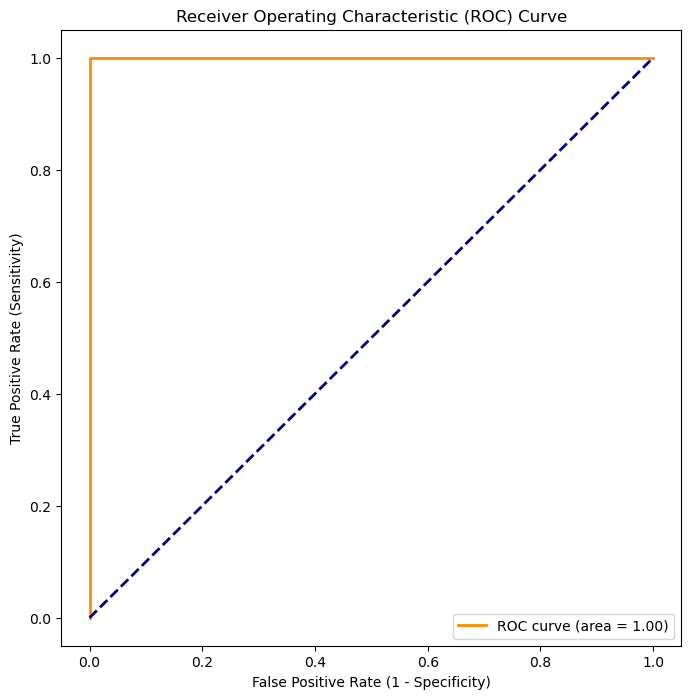

In [54]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming X_test_treated and y_test are your test data
# and true labels, respectively.

# Get predicted probabilities on the test set
y_probabilities = classification.predict_proba(X_test_treated)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Insight to the model performance:
It is evident from the plot that the AUC for the Logistic Regression ROC curve is higher than that for the KNN ROC curve. Therefore, we can say that logistic regression did a better job of classifying the positive class in the dataset.

The higher AUC==>better performance that distinguesh between the positive and negitive class

In [55]:
from sklearn.metrics import roc_auc_score

# For KNeighborsClassifier with probability estimates
predictions_knn_proba = clf.predict_proba(X_test_treated)[:, 1]
roc_auc_knn = roc_auc_score(y_test, predictions_knn_proba)
print(f"ROC-AUC for KNeighborsClassifier: {roc_auc_knn:.4f}")

# For LogisticRegression with probability estimates
predictions_logistic_proba = classification.predict_proba(X_test_treated)[:, 1]
roc_auc_logistic = roc_auc_score(y_test, predictions_logistic_proba)
print(f"ROC-AUC for LogisticRegression: {roc_auc_logistic:.4f}")


ROC-AUC for KNeighborsClassifier: 0.6250
ROC-AUC for LogisticRegression: 1.0000


In [56]:
#Clearly, the model performs significantly better with Logistic Regression compared to KNN.

# A few reasons why the ROC-AUC curves might have different shapes for logistic regression and KNN:


1.Model Assumptions:

-Logistic Regression assumes a linear relationship between the features and the log-odds of the response. If the true relationship is linear, logistic regression might perform well.

-KNN,It can capture more complex relationships but might be sensitive to noise in the data.

2.Handling of Noise and Outliers:

-KNN can be sensitive to outliers and noisy data points, as it relies on the local neighborhood of points.

-Logistic Regression is generally more robust to outliers, especially if the dataset is well-behaved and follows logistic assumptions.



In [57]:
#Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_treated,y_train)

In [58]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_treated)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  1.0
recall:  1.0
f1:  1.0


In [59]:
confusion_matrix(y_test,pred)  # only change: false positive= 0 Ture negetive=4

array([[   4,    0],
       [   0, 5773]], dtype=int64)

In [60]:
from sklearn import neighbors
clf1 = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf1.fit(X_train_SMOTE, y_train_SMOTE)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("precision: ",precision_score(y_test,predictions)) #==> true positive predictions (correctly predicted positive instances) to the total number of positive predictions made by the model
#Precision = True Positives / (True Positives + False Positives)==>positive predictions 
print("recall: ",recall_score(y_test,predictions)) #==> Recall = True Positives / (True Positives + False Negatives)==> actual positives/High recall=model is good to capture the positive intances.
print("f1: ",f1_score(y_test,predictions)) #===>It provides a balance between precision and recall.

precision:  0.9993075990998789
recall:  1.0
f1:  0.9996536796536796


# A Deep Dive into SMOTE and Model Performance:


- Imbalance Before SMOTE:
Before applying SMOTE, I had an imbalance where the minority class had very few instances compared to the majority class.

- Imbalance After SMOTE:
After applying SMOTE, the confusion matrix shows that the model predicts the majority class (Actual Positive) accurately, but the minority class (Actual Negative) is predicted only four times.

In this case, the imbalance is not in terms of the original class distribution but in terms of the model's predictive performance. The model has a heavily biased towards predicting the majority class, resulting in a high number of true positives (5773) but only a few instances correctly predicted for the minority class (Actual Negative).


In [61]:
# For KNeighborsClassifier with probability estimates after using the smote technique
predictions_knn_proba = clf1.predict_proba(X_test_treated)[:, 1]
roc_auc_knn = roc_auc_score(y_test, predictions_knn_proba)
print(f"ROC-AUC for KNeighborsClassifier: {roc_auc_knn:.4f}")

# For LogisticRegression with probability estimates after using the smote technique
predictions_logistic_proba = LR.predict_proba(X_test_treated)[:, 1]
roc_auc_logistic = roc_auc_score(y_test, predictions_logistic_proba)
print(f"ROC-AUC for LogisticRegression: {roc_auc_logistic:.4f}")


ROC-AUC for KNeighborsClassifier: 0.6250
ROC-AUC for LogisticRegression: 1.0000


In [62]:
#our model peformance is perfect.We build model, our dataset was fro 2007 and 2014,lets see our model can predict unseen data:

# Unlocking Insights: Applying Our Trained Model to Unseen Data 

In the context of monitoring a model, the out-of-sample technique means assessing the model's performance on data that it has not seen during training or testing.

In [63]:
#Define the function
def df_clean(loan_data):
    #data = loan_data
    #remove spaces from the values in each column 
    loan_data= loan_data.applymap(lambda x: x.replace(' ', '') if isinstance(x, str) else x)
    # Remove spaces from the column name
    for column in loan_data.columns:
        new_column_name = column.replace(' ', '')  
        loan_data.rename(columns={column: new_column_name}, inplace=True)
    #emp_title contains a null value  replaced the null value with 'unemployment'.#display(loan_data['emp_title'].value_counts(dropna=False))
    loan_data['emp_title']=np.where(loan_data['emp_title'].isin([""]),"uneployment",loan_data['emp_title'])
    #here, also there are null value, with shows there is no paln to payment
    loan_data['next_pymnt_d']=np.where(loan_data['next_pymnt_d'].isin([""]),"unknown",loan_data['next_pymnt_d'])
    loan_data['term'] = loan_data['term'].str.replace('months', '')
    #droping some columns
    columns_to_drop = loan_data.columns[58:]
    loan_data= loan_data.drop(columns=columns_to_drop, axis=1)
    loan_data= loan_data.drop(["tot_coll_amt",'verification_status_joint','dti_joint','annual_inc_joint','mths_since_last_major_derog','policy_code','application_type','last_pymnt_d','id','member_id','funded_amnt','emp_title','pymnt_plan','url','desc','title','zip_code','addr_state','pub_rec','open_acc','initial_list_status','out_prncp_inv','total_pymnt_inv','recoveries','collection_recovery_fee','collections_12_mths_ex_med','acc_now_delinq','next_pymnt_d','mths_since_last_record','last_credit_pull_d','funded_amnt_inv','installment','total_rec_prncp','total_rec_int','total_pymnt'] , axis=1)
     
    #Modify some weirds!
    loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+years','',regex=True)
    loan_data['emp_length'] = loan_data['emp_length'].str.replace('<1year', str(0), regex=True)
    loan_data['emp_length'] = loan_data['emp_length'].str.replace('n/a',  str(0),regex=True)
    loan_data['emp_length'] = loan_data['emp_length'].str.replace('years','',regex=True)
    loan_data['emp_length'] = loan_data['emp_length'].str.replace('year','',regex=True)
    loan_data['emp_length']=loan_data['emp_length'].str.replace('\+','',regex=True)
    # replace the null with the median, as it is shown, there is no change in the distributions
    median_lenght=loan_data['emp_length'].median()
    loan_data['emp_length']=np.where(loan_data['emp_length'].isna(),median_lenght,loan_data['emp_length']) 
    revol_median=loan_data['revol_util'].median()
    loan_data['revol_util']=np.where(loan_data['revol_util'].isna(),revol_median,loan_data['revol_util'])
    # Extracts the date and the time
    loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
    loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
     #categorical:
    loan_data['sub_grade']= np.where(loan_data['sub_grade']== 'A5','A4',loan_data['sub_grade'])
    loan_data['sub_grade']= np.where(loan_data['sub_grade']== 'B5','B4',loan_data['sub_grade'])
    loan_data['sub_grade']= np.where(loan_data['sub_grade']== 'C5','C4',loan_data['sub_grade'])
    loan_data['sub_grade']= np.where(loan_data['sub_grade']== 'D5','D4',loan_data['sub_grade'])
    sub_grade_mapping = {
            'E5': 'D4',
            'F1': 'D4',
            'F2': 'D4',
            'F3': 'D4',
            'F4': 'D4',
            'F5': 'D4',
            'G1': 'D4',
            'G2': 'D4',
            'G3': 'D4',
            'G4': 'D4',
            'G5': 'D4'
    }
    loan_data['sub_grade'] = loan_data['sub_grade'].map(sub_grade_mapping).fillna(loan_data['sub_grade'])
    loan_data['grade']= np.where(loan_data['grade']==('G'or 'F'),'E',loan_data['grade']) 
    loan_data['home_ownership']= np.where(loan_data['home_ownership']=='ANY','OWN',loan_data['home_ownership'])
    loan_data['loan_status']= np.where(loan_data['loan_status']=='Issued','Current',loan_data['loan_status'])
    #handel right skew:
    def log_transfom_clean(x):   
         if x>0:
             return np.log(x)
         else:
             return np.nan
    loan_data['annual_inc']=loan_data['annual_inc'].apply(log_transfom_clean)
    loan_data['loan_amnt']=np.sqrt(loan_data['loan_amnt'])
    loan_data['revol_bal']=np.sqrt(loan_data['revol_bal'])
    loan_data['total_acc']=np.sqrt(loan_data['total_acc'])
                                    
    #Define the target
    loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)
    #Bining data:
    income_labels = ['Low', 'Moderate', 'High', 'Very High']
    loan_data['annual_inc_bins']= pd.qcut(loan_data['annual_inc'],4,labels=income_labels)
    income_labels = ['Low', 'Moderate', 'High', 'Very High']
    loan_data['dti_bins']= pd.qcut(loan_data['dti'],4,labels=income_labels)
    data_dummy=loan_data[['dti_bins','annual_inc_bins']]
    label_encoder = LabelEncoder()

    # Apply LabelEncoder to each column separately
    label_encoder = LabelEncoder()
    # Apply LabelEncoder to each column separately
    for column in data_dummy.columns:
        data_dummy[column] = label_encoder.fit_transform(data_dummy[column])
    data_dummy.columns=['dti_bins_encoder','annual_inc_bins_encoder']
    #droping other column
    loan_data_b=loan_data.drop(['dti','annual_inc','mths_since_last_delinq','issue_d'], axis=1)  #Idrop mths_since_last_delinq based on the WOE
    loan_data_b = pd.concat([loan_data_b, data_dummy], axis=1)
    loan_data_b=loan_data_b.drop(["dti_bins",'annual_inc_bins','earliest_cr_line'],axis=1)
    #save
    loan_data_b.to_csv('clean_data1.csv', index=False)
    loan_data=pd.read_csv("clean_data1.csv")
    #Splitting the data into numerical and categorical
    numerical = loan_data.select_dtypes(include = np.number)
    categorical= loan_data.select_dtypes(include = object)
    #X-y split: 
    y = loan_data['good_bad']
    X_num = numerical.drop(['good_bad'], axis=1)
    X_cat=categorical
#     #scaling the numerical variables using minmaxscaler: 
    
#     X_test_scaled_arr = transformer.transform(X_num)
#     X_test_scaled= pd.DataFrame(X_test_scaled_arr, columns=X_num.columns)
#     #now working with the categorical variables:
#     cols = encoder.get_feature_names_out(input_features=X_cat.columns)
#     encoded = encoder.transform(X_cat).toarray()
#     onehot_encoded = pd.DataFrame(encoded, columns=cols)
#     #Concating DataFrames
#     X = pd.concat([x_numerical_s, onehot_encoded], axis=1)                               
                                                         
    return X_cat,X_num,y

In [64]:
df_predict=pd.read_csv("loan_data_2015 (5).csv")

C:\Users\Parinaz\AppData\Local\Temp\ipykernel_22564\1095371227.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df_predict=pd.read_csv("loan_data_2015 (5).csv")


In [65]:
 X_cat,X_num,y= df_clean(df_predict)

C:\Users\Parinaz\AppData\Local\Temp\ipykernel_22564\2972852812.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dummy[column] = label_encoder.fit_transform(data_dummy[column])
C:\Users\Parinaz\AppData\Local\Temp\ipykernel_22564\2972852812.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dummy[column] = label_encoder.fit_transform(data_dummy[column])


In [66]:
X_cat

,grade,sub_grade,home_ownership,verification_status,loan_status,purpose
0,C,C1,MORTGAGE,SourceVerified,Current,home_improvement
1,A,A1,MORTGAGE,NotVerified,Current,credit_card
2,C,C4,RENT,SourceVerified,Current,debt_consolidation
3,C,C1,RENT,NotVerified,Current,debt_consolidation
4,B,B4,MORTGAGE,NotVerified,Current,home_improvement
...,...,...,...,...,...,...
421089,B,B4,RENT,Verified,Current,debt_consolidation
421090,B,B4,MORTGAGE,Verified,Current,home_improvement
421091,D,D2,RENT,Verified,Current,debt_consolidation
421092,E,E3,RENT,SourceVerified,Current,debt_consolidation


In [67]:
for column in X_cat.columns:
    value_counts_result = X_cat[column].value_counts(dropna=False).index
    print(f"Column: {column}\n{value_counts_result}\n")

Column: grade
Index(['C', 'B', 'A', 'D', 'E', 'F'], dtype='object')

Column: sub_grade
Index(['B4', 'C4', 'A4', 'D4', 'C1', 'C2', 'C3', 'B3', 'B2', 'B1', 'D1', 'D2',
       'A1', 'D3', 'A2', 'A3', 'E1', 'E2', 'E3', 'E4'],
      dtype='object')

Column: home_ownership
Index(['MORTGAGE', 'RENT', 'OWN'], dtype='object')

Column: verification_status
Index(['SourceVerified', 'Verified', 'NotVerified'], dtype='object')

Column: loan_status
Index(['Current', 'FullyPaid', 'Late(31-120days)', 'InGracePeriod',
       'ChargedOff', 'Late(16-30days)', 'Default'],
      dtype='object')

Column: purpose
Index(['debt_consolidation', 'credit_card', 'home_improvement', 'other',
       'major_purchase', 'medical', 'car', 'small_business', 'moving',
       'vacation', 'house', 'renewable_energy', 'wedding', 'educational'],
      dtype='object')



In [68]:
X_num

,loan_amnt,term,int_rate,emp_length,delinq_2yrs,inq_last_6mths,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,last_pymnt_amnt,dti_bins_encoder,annual_inc_bins_encoder
0,187.082869,60,11.99,10.0,0.0,0.0,119.486401,27.4,6.782330,35000.00,0.0,0.00,1,3
1,93.005376,36,5.32,0.0,0.0,0.0,84.604964,26.7,4.898979,8650.00,0.0,0.00,1,3
2,65.000000,36,14.85,5.0,2.0,0.0,32.526912,24.6,2.449490,4225.00,0.0,0.00,2,1
3,100.000000,60,11.99,10.0,0.0,1.0,76.236474,40.9,4.795832,10000.00,0.0,0.00,3,1
4,141.421356,60,10.78,10.0,0.0,0.0,88.707384,56.2,4.242641,20000.00,0.0,0.00,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421089,100.000000,36,11.99,8.0,0.0,0.0,118.477846,82.1,3.872983,7055.47,0.0,332.10,3,1
421090,154.919334,36,11.99,10.0,0.0,1.0,92.849340,84.5,4.795832,16933.26,0.0,797.03,1,0
421091,114.017543,60,15.99,5.0,0.0,0.0,105.028568,61.3,4.690416,11155.50,0.0,316.07,3,1
421092,109.544512,60,19.99,1.0,1.0,2.0,90.851527,30.6,4.472136,10447.31,0.0,317.86,3,2


In [69]:
X_num.isna().sum()

loan_amnt                  0
term                       0
int_rate                   0
emp_length                 0
delinq_2yrs                0
inq_last_6mths             0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
total_rec_late_fee         0
last_pymnt_amnt            0
dti_bins_encoder           0
annual_inc_bins_encoder    0
dtype: int64

In [70]:
y.value_counts(dropna=False)

1    420707
0       387
Name: good_bad, dtype: int64

In [71]:
X_test_scaled_arr = transformer.transform(X_num)
X_unseen_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_num.columns)

In [72]:
 X_unseen_scaled 

,loan_amnt,term,int_rate,emp_length,delinq_2yrs,inq_last_6mths,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,last_pymnt_amnt,dti_bins_encoder,annual_inc_bins_encoder
0,1.000000,1.0,0.342723,1.0,0.000000,0.000,0.308937,0.274274,0.664919,3.359551,0.0,0.000000,0.333333,1.000000
1,0.394845,0.0,-0.005216,0.0,0.000000,0.000,0.218750,0.267267,0.416957,0.830289,0.0,0.000000,0.333333,1.000000
2,0.214700,0.0,0.491914,0.5,0.222222,0.000,0.084100,0.246246,0.094458,0.405546,0.0,0.000000,0.666667,0.333333
3,0.439838,1.0,0.342723,1.0,0.000000,0.125,0.197113,0.409409,0.403377,0.959872,0.0,0.000000,1.000000,0.333333
4,0.706281,1.0,0.279604,1.0,0.000000,0.000,0.229357,0.562563,0.330544,1.919743,0.0,0.000000,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421089,0.439838,0.0,0.342723,0.8,0.000000,0.000,0.306329,0.821822,0.281875,0.677235,0.0,0.009325,1.000000,0.333333
421090,0.793107,0.0,0.342723,1.0,0.000000,0.125,0.240066,0.845846,0.403377,1.625376,0.0,0.022380,0.333333,0.000000
421091,0.530006,1.0,0.551382,0.5,0.000000,0.000,0.271556,0.613614,0.389498,1.070785,0.0,0.008875,1.000000,0.333333
421092,0.501233,1.0,0.760042,0.1,0.111111,0.250,0.234900,0.306306,0.360759,1.002808,0.0,0.008925,1.000000,0.666667


In [73]:
encoded_unseen_cat = encoder.transform(X_cat).toarray()
onehot_encoded_unseen = pd.DataFrame(encoded_unseen_cat, columns=cols)

In [74]:
onehot_encoded_unseen 

,grade_B,grade_C,grade_D,grade_E,grade_F,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,home_ownership_OWN,home_ownership_RENT,verification_status_SourceVerified,verification_status_Verified,loan_status_Current,loan_status_Default,loan_status_FullyPaid,loan_status_InGracePeriod,loan_status_Late(16-30days),loan_status_Late(31-120days),purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421089,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421090,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421091,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421092,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
X_test_unseen=pd.concat([ X_unseen_scaled , onehot_encoded_unseen ], axis=1)

In [76]:
X_test_unseen.isna().sum()/len(X_test_unseen)

loan_amnt                   0.0
term                        0.0
int_rate                    0.0
emp_length                  0.0
delinq_2yrs                 0.0
                           ... 
purpose_other               0.0
purpose_renewable_energy    0.0
purpose_small_business      0.0
purpose_vacation            0.0
purpose_wedding             0.0
Length: 61, dtype: float64

In [77]:
from sklearn.metrics import r2_score
predictions = classification.predict(X_test_unseen) 

In [78]:
predictions[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [79]:
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: good_bad, dtype: int64

In [80]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("precision: ",precision_score(y,predictions)) #==> true positive predictions (correctly predicted positive instances) to the total number of positive predictions made by the model
#Precision = True Positives / (True Positives + False Positives)==>positive predictions 
print("recall: ",recall_score(y,predictions)) #==> Recall = True Positives / (True Positives + False Negatives)==> actual positives/High recall=model is good to capture the positive intances.
print("f1: ",f1_score(y,predictions)) 

precision:  0.9991901160912771
recall:  1.0
f1:  0.9995948940012237


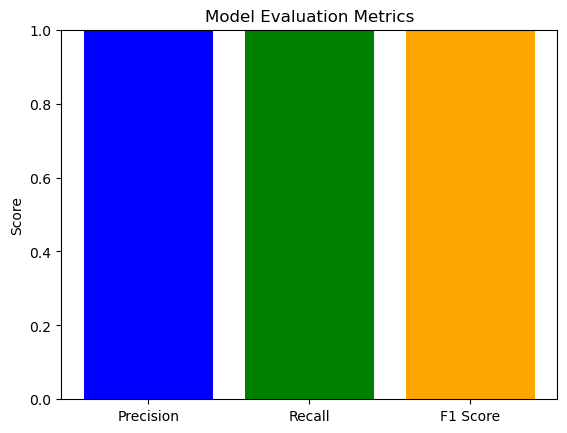

In [81]:
precision = precision_score(y, predictions)
recall = recall_score(y, predictions)
f1 = f1_score(y, predictions)
labels = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]

plt.bar(labels, values, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)  # Assuming scores are between 0 and 1
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.show()

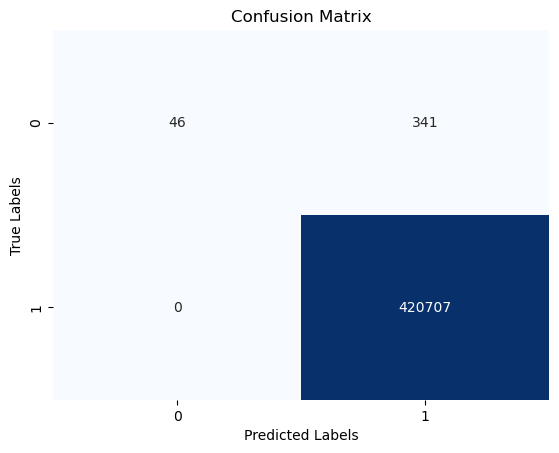

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_test_unseen' is the true labels for the unseen data
# Replace this with your actual data
# y_test_unseen = ...

# Make predictions on the unseen data
predictions = classification.predict(X_test_unseen)

# Create a confusion matrix
conf_matrix = confusion_matrix(y, predictions)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Conclusion : 

- High Predictive Accuracy: The high precision, recall, and F1-score suggest that the model is performing exceptionally well on the unseen dataset. It is making accurate predictions with a low rate of false positives and false negatives.
- Effective Generalization: The model is likely generalizing effectively to new, previously unseen data. 
- Balanced Precision and Recall: The balance between precision and recall, as reflected in the high F1-score, suggests that the model is achieving a good trade-off between minimizing false positives and false negatives.